##3) Using semantic vectors to decode brain activation

### Load the data

In [11]:
# Download and extract the data and learn_decoder.py
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56" -O files.zip && rm -rf /tmp/cookies.txt
!wget --header="Host: drive.usercontent.google.com" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-US,en;q=0.9,he;q=0.8" --header="Cookie: HSID=AHJfxja1o67aaDDKP; SSID=AcFaYUEeiC88MwrF9; APISID=-FXvHmBvJ828Jrpq/AaIp_RI6gKwBAA-zy; SAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; __Secure-1PAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; __Secure-3PAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; S=billing-ui-v3=pX9aAWC8SzxQZfQvQ-0SbCFRz65PPkVY:billing-ui-v3-efe=pX9aAWC8SzxQZfQvQ-0SbCFRz65PPkVY:maestro=dsv3G-owxPD6uTATLH0lBQZNadhFo6ZKJiuB9usoQVU; __Secure-BUCKET=CPgG; SID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyx_uObP_F4bCqI8I561ccGMwACgYKAWESARQSFQHGX2Mi5DnhBiJ2gjjbMSP0XJbU5BoVAUF8yKrlBjWMdNOfGnmA7TZzmbWD0076; __Secure-1PSID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyx2BFINS8lXhFUyAFwuvl8CQACgYKAW4SARQSFQHGX2MiWd6bHkI0JN89-1dFZUbS2hoVAUF8yKpc-H3AD8N6tj-dmFG21SeE0076; __Secure-3PSID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyxJl_TGsCsjeiVN72q3lSCWQACgYKASASARQSFQHGX2MiULluXa7aABDwxgCWjB6IyhoVAUF8yKoy_HHYLCqIFMwNjx-GwYWe0076; __Secure-ENID=20.SE=jyM_w2hA8DW6FvPOh9wudde93a0A9P41Epzo098LV_LyU79-VVcJ9K-vNLrhCLuVzi69CyV4RxlSls8AAT9J8odwIXi_ISVn8Z1U1DH52BC3YiwOwO9LKUsBesCbGx2D6u1XwZ5GIP_PZMo1tkLLJq2VCtcxRP9OtC_QgHNbAD4eyc1TTu1C8XbZLFTOIgb0k9IfM2bMBXeha6t3sJysARZWpDIzs3I8wWZ5JtABB253grtjQyCnxyy9MUgTcYAVaoEGwgVHV4V4lSY6gydFkO2gYxl7JqYloqCq74HahGK54TBlsGZIOTM_KvFAsIidcrPaVOBpH6IGQTPChxy3Tr-GLK7VpBiQ8JW7V0xC8XTN1crEaaZnGFQ6MrjDv8f3hCY0Kg; AEC=AQTF6HwEtUB747fVHMzvOWJV9pmRoGs8Ix8FJ1HTrxbE9NY1dtyro2AvNQ; NID=515=Wdt0NWZqVSh3TtdIfjXCGTCCkj7jaJjt-lkOL3hLD_hPSSMyGxKkVthECwGGFbbxmvfM2iKZ1SkPGDVgLwjghAOrV9Ya7iEJJ0eSXZSfszc0WxRXm3Jy6LxqPEZLmY8v3AIkMX-o8KE5ZRXGEzgv_s9pfgS8bmeiIGT13Iiyw9tPzRZDChGijNbZ0Mp1oF-4YKikOZCyo8Km9wXOgLAC9dbeIqAlTdER97cQ7B5GajyRLH_bFrg0lCVN4tyZEycjihHOu6Eq_V88rswgV7uvzemJ_yk4WbbIWJVm9NCO4tWdDQG8NY3EY57xAJbmIhu260jDftYwzjCnpqJ8C1iCm-FjboF6xJwKJEtLkCXagIcSWxfPGqRWIn5KY72ogAMZTlUZ5RE5F8bH4sFgkt5pW_AalY5mxYPOfZgF-9hcJYsF71rMOic6mqSfvR8iNo-k6_SZ-4o5WkYxbwdLgiaIOiCJHkhIGBoXsm5hh5BHDqlk5ERGnFn5zpqOguNLJFjXT3nhaP1g_a2fFvd0bmZw2A9Y6tBNAC7CbDOmSHSmYmLag0qVcqu286CZh5svuhdM-QPcSCt5u0kPgfWN3KBha0G9L9qCiDIwntvnlVNoUYLBM4je1bhGjO9M2tdH_vteLo4vjm9Cq-4I2A; __Secure-1PSIDTS=sidts-CjIB3EgAEi6AJoaJlu_IOdqmparuSFUne3RqD5YKK5hcqKjRlc0CTp9lSpyH2OoVVoqmlxAA; __Secure-3PSIDTS=sidts-CjIB3EgAEi6AJoaJlu_IOdqmparuSFUne3RqD5YKK5hcqKjRlc0CTp9lSpyH2OoVVoqmlxAA; SIDCC=AKEyXzW7IJ8miV8hX_pqzqqPW7--eMWuWfausspLBoDPlfZDCRZDED56ohpancLYOBPizfUzi1aM; __Secure-1PSIDCC=AKEyXzVGnmSuG07J22njRVFPQ_sk88MgnqtYxJd-M0_9Pz3jdh4GpGPhPOqCMrayTU9SJTW3n54; __Secure-3PSIDCC=AKEyXzVScJYbKdtIImPYKpTRkExsc5UhC5n9Rkk8wNFlMZNW3_xkvWlimAXWaZ4T7kTcJy5AE4I" --header="Connection: keep-alive" "https://drive.usercontent.google.com/download?id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56&export=download&authuser=0&confirm=t&uuid=efeb9ce5-a5c5-453b-938d-6c0ece963f3c&at=APZUnTV18b5mSao0MQ2JbtpefTxr%3A1719665236172" -c -O 'files.zip'
!unzip files.zip
!rm files.zip

--2024-08-26 16:25:24--  https://drive.usercontent.google.com/download?id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56&export=download&authuser=0&confirm=t&uuid=efeb9ce5-a5c5-453b-938d-6c0ece963f3c&at=APZUnTV18b5mSao0MQ2JbtpefTxr%3A1719665236172
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.125.132, 2607:f8b0:4001:c2f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.125.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97708666 (93M) [application/octet-stream]
Saving to: ‘files.zip’

files.zip           100%[===================>]  93.18M  49.1MB/s    in 1.9s    

2024-08-26 16:25:28 (49.1 MB/s) - ‘files.zip’ saved [97708666/97708666]

Archive:  files.zip
  inflating: stimuli_180concepts.txt  
  inflating: learn_decoder.py        
  inflating: vectors_180concepts.GV42B300.txt  
  inflating: imaging_data.csv        


In [12]:
import os

# Save the current working directory
original_working_directory = os.getcwd()
print("Original working directory:", original_working_directory)

Original working directory: /content


In [13]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/project_lcc')
os.listdir('.')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['glove.42B.300d.txt',
 'vectors_384sentences.GV42B300.average.txt',
 'vectors_243sentences.GV42B300.average.txt',
 'stimuli_384sentences.txt',
 'stimuli_243sentences.txt',
 'EXP3.pkl',
 'neuralData_for_EXP1.csv',
 'EXP2.pkl',
 'stimuli_180concepts.txt',
 'learn_decoder.py',
 'vectors_180concepts.GV42B300.txt',
 'imaging_data.csv',
 '__pycache__',
 'colab_pdf.py']

In [14]:
import pandas as pd

neural_data_exp1 = pd.read_csv('neuralData_for_EXP1.csv', index_col=0)
print(neural_data_exp1.head())


           0          1          2          3          4         5         6  \
0  -8.173708  -5.593922  -4.737303  -3.210317  -5.064872 -2.867938 -0.647879   
1  14.175880  12.258254  15.118346  16.929986  14.128274  7.703238  5.102477   
2  11.025751   9.451916  11.282665  10.330555   9.168634  6.326451  8.325448   
3  -9.224141 -10.744989 -12.231927  -9.563610  -2.367995 -2.873559 -2.707560   
4 -11.051150 -14.732372 -17.551868 -14.449508  -8.301250 -5.309789 -3.145870   

           7          8          9  ...     185856     185857     185858  \
0   0.630494   4.112772   7.625108  ...  23.007180  15.161489 -10.211452   
1   7.847398  13.293932  18.975664  ...  32.169971  23.818106  11.242535   
2  11.559850  10.385498  11.301625  ...  11.159157   5.839374 -29.386549   
3  -2.943065  -0.751547   0.859832  ...  22.441511  20.071060  12.036822   
4  -6.857210 -13.070992 -13.807587  ...   4.275233  -3.619274 -14.709950   

      185859     185860     185861     185862     185863     1

In [15]:
with open('stimuli_243sentences.txt', 'r') as file:
    stimuli_243sentences = file.read()
print(stimuli_243sentences)

Beekeeping encourages the conservation of local habitats.
It is in every beekeeper's interest to conserve local plants that produce pollen.
As a passive form of agriculture, it does not require that native vegetation be cleared to make way for crops.
Beekeepers also discourage the use of pesticides on crops, because they could kill the honeybees.
Artisanal beekeepers go to extremes for their craft, but their product is worth the effort.
Artisanal honey-making emphasizes quality and character over quantity and consistency.
To produce the finest honey, beekeepers become micromanagers of their honeybees.
They scout the fields, know when nectar flows, and select the best ways to extract honey.
As the beekeeper opens the hive, the deep hum of 40,000 bees fills the air.
The beekeeper checks honey stores, pollen supplies, and the bee nursery.
Bees crawl across his bare arms and hands, but they don't sting, because they're gentle.
I have a recurring dream about exams, even though I'm no longer

In [16]:
with open('stimuli_384sentences.txt', 'r') as file:
    stimuli_384sentences = file.read()
print(stimuli_384sentences)

An accordion is a portable musical instrument with two keyboards.
One keyboard is used for individual notes, the other for chords.
Accordions produce sound with bellows that blow air through reeds.
An accordionist plays both keyboards while opening and closing the bellows.
An apartment is a self-contained home that is part of a building.
An apartment may have one or more rooms, as well as a kitchen and a bathroom.
Some apartments are for single people, others for families.
The building can have a garage, a laundry facility or extra storage space.
An apple is a fruit that can be green, red or yellow.
Apples have thin skin, a crisp, sweet pulp and seeds inside.
Some very tart apples are used to make cider.
Apples can be eaten raw, roasted or baked in pies.
Arson is the criminal act of burning a building or wildland.
A fire investigation determines if a fire was caused by accident or arson.
Arson can be done to cause damage to others or collect insurance.
The severity of the crime depends

In [13]:
from learn_decoder import *
vectors_243 = read_matrix('vectors_243sentences.GV42B300.average.txt', sep=" ")
# print(vectors_243.head())

vectors_384 = read_matrix('vectors_384sentences.GV42B300.average.txt', sep=" ")
# print(vectors_384.head())


In [18]:
import pickle

with open('EXP3.pkl', 'rb') as f:
    exp3_data = pickle.load(f)
    print(exp3_data.keys())

with open('EXP2.pkl', 'rb') as f:
    exp2_data = pickle.load(f)
    print(exp2_data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'keyPassageCategory', 'keyPassages', 'keySentences', 'labelsPassageCategory', 'labelsPassageForEachSentence', 'labelsSentences', 'meta', 'Fmridata'])
dict_keys(['__header__', '__version__', '__globals__', 'keyPassageCategory', 'keyPassages', 'keySentences', 'labelsPassageCategory', 'labelsPassageForEachSentence', 'labelsSentences', 'meta', 'Fmridata'])


In [19]:

# Change back to the default working directory
os.chdir('/content')
# Confirm the change
print("Returned to the default working directory:", os.getcwd())

Returned to the default working directory: /content


In [20]:
#Let's load the functions from learn_decoder.py
from learn_decoder import *

#and the data
data = read_matrix("imaging_data.csv", sep=",")
vectors = read_matrix("vectors_180concepts.GV42B300.txt", sep=" ")
concepts = np.genfromtxt('stimuli_180concepts.txt', dtype=np.dtype('U')) #The names of the 180 concepts

In [21]:
type(data)

numpy.ndarray

You can verify for your self what learn_decoder consists of by going to Files and opening it.

### What are the Accuracy scores?

Define a function that computes rank-based accuracy score, then, iterate over the 18 folds. For each fold,  train the decoder **using the `learn_decoder` function** (the function is already imported from `learn_decoder.py`) on the fold train data, obtain the predicions on the fold test data, and store both the accuracy score of each concept (use the labels from `concepts`) as well as the average score of the 10 concepts.  

In [22]:
import numpy as np
import random

seed = 42
indices = list(range(180))

def cosine_similarity(x: np.ndarray, y: np.ndarray) -> float:
    dot_prod = np.dot(x, y)
    norm_prod = np.linalg.norm(x) * np.linalg.norm(y)
    return dot_prod / norm_prod

folds_avg_ranks = []
concept_rank = []

for fold_i in range(18):
    test_inds = indices[fold_i * 10 : (fold_i + 1) * 10]
    train_inds = indices[:fold_i * 10] + indices[(fold_i + 1) * 10:]

    data_test_vectors = np.take(data, test_inds, axis=0)
    data_train_vectors = np.take(data, train_inds, axis=0)
    semantic_test_vectors = np.take(vectors, test_inds, axis=0)
    semantic_train_vectors = np.take(vectors, train_inds, axis=0)

    model = learn_decoder(data_train_vectors, semantic_train_vectors)

    sum_ranks = 0
    for i in range(len(test_inds)):
        our_pred = np.dot(data_test_vectors[i], model)
        true_concept = semantic_test_vectors[i]
        ranked = sorted(vectors, key=lambda sem_vec: cosine_similarity(sem_vec, our_pred), reverse=True)
        rank = np.argwhere(np.all(ranked == true_concept, axis=1))[0][0] + 1
        sum_ranks += rank
        concept_rank.append(rank)

    folds_avg_ranks.append(sum_ranks / 10)

print(data.shape)
print(vectors.shape)
print(concepts.shape)


(180, 170712)
(180, 300)
(180,)


Now let's plot the averaged accuracy score for each fold  

18
18


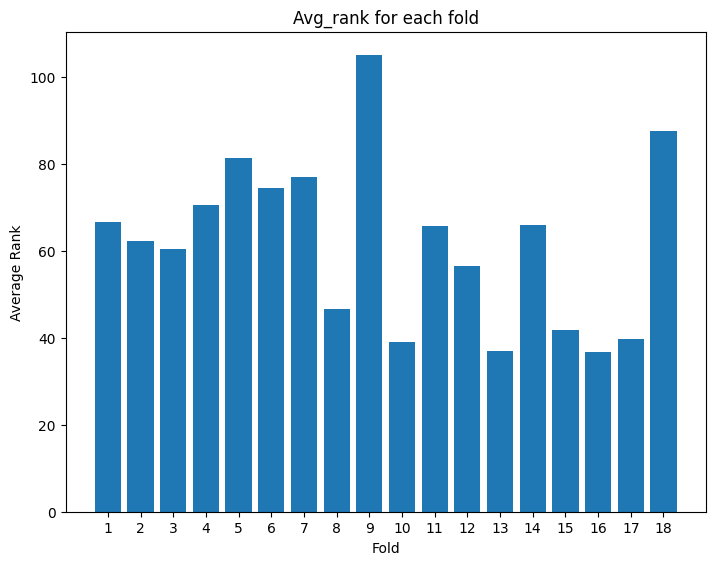

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
folds = list(range(1,19))
folds = [str(number) for number in folds]
accs = folds_avg_ranks
print(len(folds))
print(len(accs))
ax.bar(folds,accs)
plt.title("Avg_rank for each fold")
plt.xlabel("Fold")
plt.ylabel("Average Rank")
plt.show()

#TODO

In [24]:
average_rank = sum(folds_avg_ranks) / len(folds_avg_ranks)
average_rank

61.91111111111112

In [25]:
max(folds_avg_ranks)

105.1

In [26]:
min(folds_avg_ranks)

36.8

In [27]:
var_rank = sum((xi - average_rank) ** 2 for xi in folds_avg_ranks) / len(folds_avg_ranks)
np.sqrt(var_rank)

18.785777388725904

### Which concepts can be decoded with more or less success?

In [28]:
#TODO
more_success = []
less_success = []
for i in range(180):
  if concept_rank[i] <= 18:
    more_success.append(concepts[i])
  else:
    less_success.append(concepts[i])
print(f"{len(more_success)} Concepts were decoded with more success:")
print(more_success)
print(f"{len(less_success)} Concepts were decoded with less success:")
print(less_success)

42 Concepts were decoded with more success:
['ability', 'art', 'attitude', 'big', 'building', 'construction', 'crazy', 'damage', 'dinner', 'do', 'event', 'extremely', 'feeling', 'fish', 'food', 'great', 'hair', 'help', 'lady', 'laugh', 'left', 'light', 'money', 'mountain', 'music', 'picture', 'play', 'quality', 'read', 'relationship', 'road', 'shape', 'show', 'silly', 'skin', 'soul', 'stupid', 'successful', 'team', 'time', 'wear', 'word']
138 Concepts were decoded with less success:
['accomplished', 'angry', 'apartment', 'applause', 'argument', 'argumentatively', 'bag', 'ball', 'bar', 'bear', 'beat', 'bed', 'beer', 'bird', 'blood', 'body', 'brain', 'broken', 'burn', 'business', 'camera', 'carefully', 'challenge', 'charity', 'charming', 'clothes', 'cockroach', 'code', 'collection', 'computer', 'cook', 'counting', 'dance', 'dangerous', 'deceive', 'dedication', 'deliberately', 'delivery', 'dessert', 'device', 'dig', 'disease', 'dissolve', 'disturb', 'doctor', 'dog', 'dressing', 'driver', 

### Are the results satisfactory, in your opinion? Why or why not?

\#TODO

As shown in the bar graph, all but one fold achieved an average ranking score below 80, indicating strong performance. This is considerably better than a random guess, which would yield a score of 90.

We defined a "successful" decoding as identifying the correct concept within the top 10% of the rankings (i.e., a rank of 18 or lower). The results show that we achieved this for 48 concepts, which is nearly 27% of our data classified very successfully.

Considering the complexity of the task (essentially "reading minds"), these results are highly satisfactory. We achieved accuracy significantly above chance, which we regard as a substantial success.

In [ ]:
# Step 1: Install gensim (uncomment if needed)
!pip install gensim

In [ ]:
import numpy as np
import gensim.downloader as api
import random
import matplotlib.pyplot as plt

# Load the Google News pre-trained Word2Vec model
word2vec_model = api.load("word2vec-google-news-300")

[--------------------------------------------------] 0.2% 3.6/1662.8MB downloaded

KeyboardInterrupt: 

Folds Average Ranks: [69.4, 81.0, 76.5, 55.8, 44.8, 55.5, 61.0, 60.4, 65.6, 50.1, 65.0, 58.9, 66.4, 50.7, 37.9, 73.1, 68.6, 54.3]
Concept Ranks: [69, 151, 15, 23, 114, 97, 172, 14, 15, 24, 93, 103, 110, 131, 136, 35, 15, 8, 71, 108, 18, 98, 8, 100, 78, 134, 47, 105, 143, 34, 64, 21, 80, 113, 46, 85, 8, 90, 8, 43, 89, 32, 48, 47, 70, 82, 16, 38, 4, 22, 63, 98, 74, 11, 46, 20, 10, 129, 41, 63, 47, 80, 2, 85, 104, 46, 28, 106, 15, 97, 12, 141, 4, 79, 123, 53, 36, 3, 133, 20, 73, 81, 42, 81, 40, 70, 86, 112, 32, 39, 15, 89, 1, 43, 76, 160, 5, 56, 13, 43, 65, 46, 110, 41, 42, 33, 63, 152, 12, 86, 101, 89, 95, 23, 10, 24, 57, 29, 71, 90, 26, 71, 49, 62, 142, 83, 99, 18, 65, 49, 61, 116, 74, 24, 100, 4, 59, 28, 7, 34, 47, 55, 51, 3, 47, 13, 21, 7, 133, 2, 70, 75, 143, 64, 1, 93, 54, 81, 125, 25, 44, 43, 72, 114, 100, 10, 62, 132, 68, 41, 55, 7, 123, 80, 67, 95, 9, 41, 22, 44]


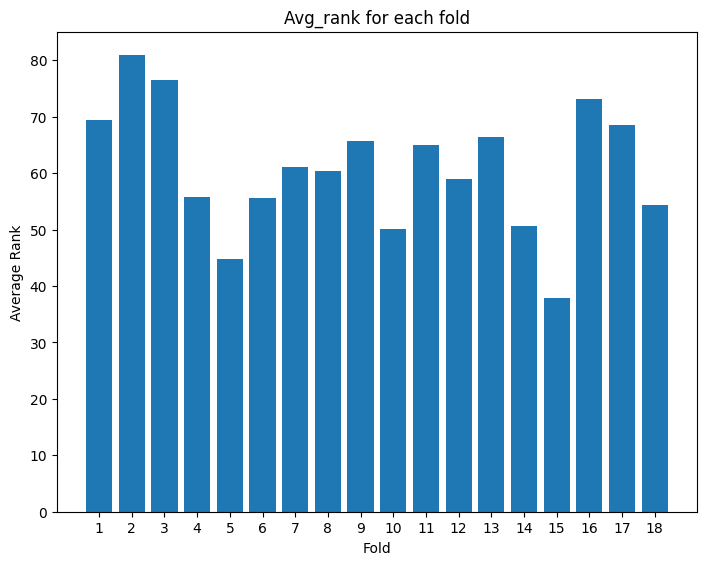

35 Concepts were decoded with more success:
['angry', 'art', 'attitude', 'big', 'bird', 'brain', 'building', 'cook', 'crazy', 'dessert', 'dig', 'do', 'dressing', 'emotion', 'feeling', 'fish', 'food', 'hair', 'lady', 'laugh', 'liar', 'magic', 'music', 'personality', 'reaction', 'seafood', 'sexy', 'silly', 'skin', 'smiling', 'soul', 'stupid', 'tree', 'useless', 'wear']
145 Concepts were decoded with less success:
['ability', 'accomplished', 'apartment', 'applause', 'argument', 'argumentatively', 'bag', 'ball', 'bar', 'bear', 'beat', 'bed', 'beer', 'blood', 'body', 'broken', 'burn', 'business', 'camera', 'carefully', 'challenge', 'charity', 'charming', 'clothes', 'cockroach', 'code', 'collection', 'computer', 'construction', 'counting', 'damage', 'dance', 'dangerous', 'deceive', 'dedication', 'deliberately', 'delivery', 'device', 'dinner', 'disease', 'dissolve', 'disturb', 'doctor', 'dog', 'driver', 'economy', 'election', 'electron', 'elegance', 'emotionally', 'engine', 'event', 'experime

In [ ]:
# Function to get Word2Vec vectors for the concepts
def get_word2vec_vectors(concepts):
    vectors = []
    for concept in concepts:
        if concept in word2vec_model:
            vectors.append(word2vec_model[concept])
        else:
            vectors.append(np.random.rand(word2vec_model.vector_size))  # Use random vector for missing concepts
    return np.array(vectors)

# Get Word2Vec vectors for the concepts
vectors = get_word2vec_vectors(concepts)

seed = 42
random.seed(seed)
indices = list(range(180))

folds_avg_ranks = []
concept_rank = []

for fold_i in range(18):
    test_inds = indices[fold_i * 10 : (fold_i + 1) * 10]
    train_inds = indices[:fold_i * 10] + indices[(fold_i + 1) * 10:]

    data_test_vectors = np.take(data, test_inds, axis=0)
    data_train_vectors = np.take(data, train_inds, axis=0)
    semantic_test_vectors = np.take(vectors, test_inds, axis=0)
    semantic_train_vectors = np.take(vectors, train_inds, axis=0)

    model = learn_decoder(data_train_vectors, semantic_train_vectors)

    sum_ranks = 0
    for i in range(len(test_inds)):
        our_pred = np.dot(data_test_vectors[i], model)
        true_concept = semantic_test_vectors[i]
        ranked = sorted(vectors, key=lambda sem_vec: cosine_similarity(sem_vec, our_pred), reverse=True)
        rank = np.argwhere(np.all(ranked == true_concept, axis=1))[0][0] + 1
        sum_ranks += rank
        concept_rank.append(rank)

    folds_avg_ranks.append(sum_ranks / 10)


# Print the ranks to diagnose
print("Folds Average Ranks:", folds_avg_ranks)
print("Concept Ranks:", concept_rank)

# Plotting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
folds = list(range(1, 19))
folds = [str(number) for number in folds]
accs = folds_avg_ranks
ax.bar(folds, accs)
plt.title("Avg_rank for each fold")
plt.xlabel("Fold")
plt.ylabel("Average Rank")
plt.show()

# Additional Analysis
more_success = []
less_success = []
for i in range(180):
    if concept_rank[i] <= 18:
        more_success.append(concepts[i])
    else:
        less_success.append(concepts[i])

print(f"{len(more_success)} Concepts were decoded with more success:")
print(more_success)
print(f"{len(less_success)} Concepts were decoded with less success:")
print(less_success)

In [ ]:
average_rank = sum(folds_avg_ranks) / len(folds_avg_ranks)
average_rank

60.833333333333336

In [ ]:
max(folds_avg_ranks)

81.0

In [ ]:
min(folds_avg_ranks)

37.9

In [ ]:
var_rank = sum((xi - average_rank) ** 2 for xi in folds_avg_ranks) / len(folds_avg_ranks)
np.sqrt(var_rank)

10.823585357911675

\#TODO

compression between the graphs:

We can see thetwo models got simillar avrege resukts as for w2v the average rank was 60.83 and for glove 61.91, but in our opinion from what can be seen from the graph the word2vec model did better as it has less variance and more consistantly proformed well (more robust over folds) in comperision to glove that was very fold dependent.
We can see the max avrage rank for glove is 105 compared 80 by word2vec when a random model would get around ~90 avrage rank (lower is better).

## Read Pereira et al., 2018 and describe the similarities and differences between analyzes 1, 2, and 3 in that paper.

\# TODO

All of the analyses were focused on evaluating the capabilities of the model to create semantic vectors given stimuli representing concepts but there were also major diffrences between them.
In analysis 1 the stimuli are individual concepts (single words) compared to 2 and 3 where the stimuli are sentences.
The data used in analysis 1 (180 words) were the base for training the decoder model for all the expiriments, the diffrence is that in 1 it was used in cross validation to see how good we can decode words and in 2 and 3 all of the data was used to train the decoder and the expirement checks the ability of model trained on single words to generalize to sentances.

Although analyses 2 and 3 were more similar to each other compered to analysis 1 there are also some diffrences between them.
 The data from expiriment 2 contained 384 sentances and the data for 3 contained 243, because of the number of sentances expiriment 2 took longer than 3 for each participent (7 min 34 s compared to 4 min 56 s). Both of the expiriments had sentances from 24 topics, the topics in the two expiriments were diffrent. they both shown similar results for the pair-wise comparison for diffrent topic, same topic and same passage comparison, the rank accuracy in analyses 2 was slightly lower (better) then 3.
<!-- ### Similarities: -->
<!--
* All analyses used the same decoding model trained on brain images associated with individual words.
* All analyses used pairwise classification and rank accuracy to evaluate the decoding performance.
* All analyses used the same training set of 180 words

### Differences:

* Analysis 1 focused on individual words, while Analyses 2 and 3 focused on sentences.
* Analysis 1 aimed to validate the decoding approach for individual words, while Analyses 2 and 3 aimed to test the generalization to sentence-level decoding from different types of textual content, requiring the decoder to generalize beyond single-word meanings to more complex linguistic structures. -->

In [29]:
os.chdir('/content/drive/My Drive/project_lcc')
os.listdir('.')
data = neural_data_exp1
os.chdir('/content')
vectors = read_matrix("vectors_180concepts.GV42B300.txt", sep=" ")
concepts = np.genfromtxt('stimuli_180concepts.txt', dtype=np.dtype('U')) #The names of the 180 concepts

In [32]:
import learn_decoder as ld
glove_model=ld.learn_decoder(data, vectors)

In [33]:
data_384 = exp2_data['Fmridata']

# Verify the shapes
print(data_384.shape)
print(vectors_384.shape)

# # Set seed for reproducibility
# seed = 42
# random.seed(seed)
indices_384 = list(range(384))

# def cosine_similarity(x: np.ndarray, y: np.ndarray) -> float:
#     dot_prod = np.dot(x, y)
#     norm_prod = np.linalg.norm(x) * np.linalg.norm(y)
#     return dot_prod / norm_prod

# def learn_decoder(train_data, train_semantics):
#     return np.linalg.lstsq(train_data, train_semantics, rcond=None)[0]

# folds_avg_ranks_384 = []
concept_rank_384 = []

# for fold_i in range(38):  # Adjusted for 384 sentences
#     test_inds = indices_384[fold_i * 10 : (fold_i + 1) * 10]
#     train_inds = indices_384[:fold_i * 10] + indices_384[(fold_i + 1) * 10:]

#     data_test_vectors = np.take(data_384, test_inds, axis=0)
#     data_train_vectors = np.take(data_384, train_inds, axis=0)
#     semantic_test_vectors = np.take(vectors_384, test_inds, axis=0)
#     semantic_train_vectors = np.take(vectors_384, train_inds, axis=0)

#     model = learn_decoder(data_train_vectors, semantic_train_vectors)

sum_ranks = 0
for i in range(len(indices_384)):
    our_pred = np.dot(data_384[i], glove_model)
    true_concept = vectors_384[i]  # Convert Series to NumPy array
    ranked = sorted(vectors_384, key=lambda sem_vec: cosine_similarity(sem_vec, our_pred), reverse=True)  # Convert DataFrame to NumPy array
    try:
        rank = np.argwhere(np.all(ranked == true_concept, axis=1))[0][0] + 1  # Now the comparison should work
    except IndexError:
        print("True concept not found in ranked list")
        rank = 0  # Or handle the case as appropriate

    sum_ranks += rank
    concept_rank_384.append(rank)

accuracy_384 = sum_ranks/len(indices_384)
    # folds_avg_ranks_384.append(sum_ranks / 10)

print("Average rank for Analysis 2:", accuracy_384)

(384, 185866)
(384, 300)
Average rank for Analysis 2: 156.92708333333334


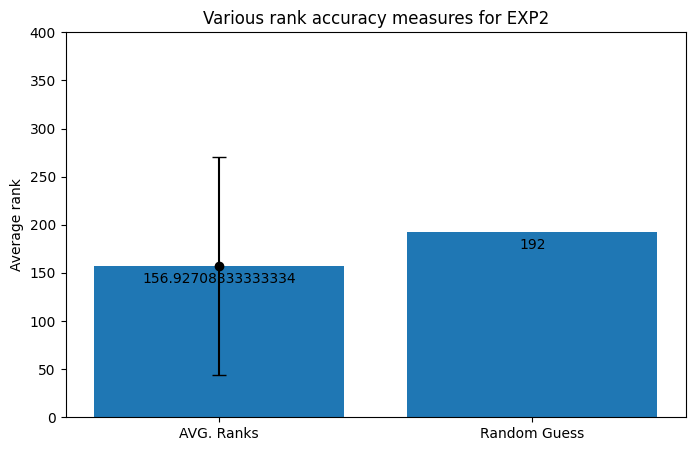

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
min_rank = 1
avg_rank = np.mean(concept_rank_384)
std_rank = np.std(concept_rank_384)
random_guess = 192
max_rank = 376

# Data for the bars
ranks = [avg_rank, random_guess]
labels = ['AVG. Ranks', 'Random Guess']

# Create the plot
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, ranks)

# Add the error bar for the average rank
plt.errorbar(x=0, y=avg_rank, yerr=std_rank, fmt='o', color='black', capsize=5)

# Annotate the bars with their respective values
for bar, rank in zip(bars, ranks):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 20,
             f'{rank}', ha='center', va='bottom', color='black')

# Set the title and labels
plt.title('Various rank accuracy measures for EXP2')
plt.ylabel('Average rank')
plt.ylim(0, 400)

# Show the plot
plt.show()


In [51]:
data_243 = exp3_data['Fmridata']

indices_243 = list(range(243))
concept_rank_243 = []

sum_ranks = 0
for i in range(len(indices_243)):
    our_pred = np.dot(data_243[i], glove_model)
    true_concept = vectors_243[i]
    ranked = sorted(vectors_243, key=lambda sem_vec: cosine_similarity(sem_vec, our_pred), reverse=True)  # Convert DataFrame to NumPy array
    try:
        rank = np.argwhere(np.all(ranked == true_concept, axis=1))[0][0] + 1  # Now the comparison should work
    except IndexError:
        print("True concept not found in ranked list")
        rank = 0

    sum_ranks += rank
    concept_rank_243.append(rank)

accuracy_243 = sum_ranks/len(indices_243)

print("Average rank for Analysis 2:", accuracy_243)


Average rank for Analysis 2: 100.7448559670782


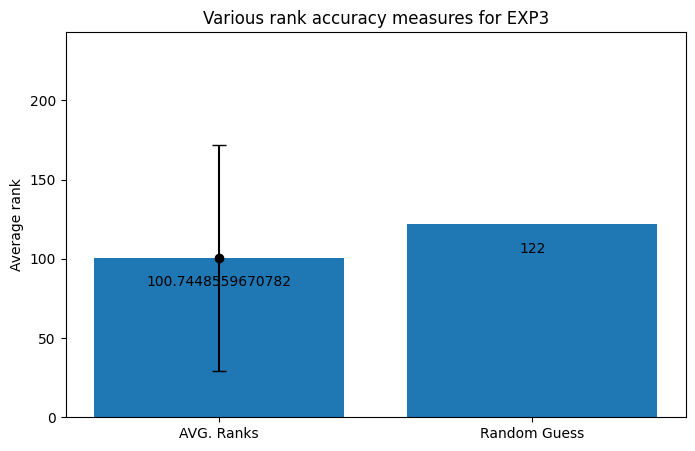

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
avg_rank = np.mean(concept_rank_243)
std_rank = np.std(concept_rank_243)
random_guess = 122

# Data for the bars
ranks = [avg_rank, random_guess]
labels = ['AVG. Ranks', 'Random Guess']

# Create the plot
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, ranks)

# Add the error bar for the average rank
plt.errorbar(x=0, y=avg_rank, yerr=std_rank, fmt='o', color='black', capsize=5)

# Annotate the bars with their respective values
for bar, rank in zip(bars, ranks):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 20,
             f'{rank}', ha='center', va='bottom', color='black')

# Set the title and labels
plt.title('Various rank accuracy measures for EXP3')
plt.ylabel('Average rank')
plt.ylim(0, 243)

# Show the plot
plt.show()


#Part4

In [ ]:
def analyze_accuracy_by_topic(concept_ranks, topics, passages):
    topic_ranks = {}
    for i, rank in enumerate(concept_ranks):
        passage_id = int(passages[i])  # Convert passage_id to integer
        topic_id = int(topics[passage_id-1])  # Convert topic_id to integer

        if topic_id not in topic_ranks:
            topic_ranks[topic_id] = []

        topic_ranks[topic_id].append(rank)

    # Calculate average rank for each topic
    avg_topic_ranks = {topic: np.mean(ranks) for topic, ranks in topic_ranks.items()}

    # Sort topics by their average rank
    sorted_topics = sorted(avg_topic_ranks.items(), key=lambda item: item[1])

    return sorted_topics

# Analysis for 384 dataset
passages_384 = exp2_data['labelsPassageForEachSentence']
topics_384 = exp2_data['labelsPassageCategory']
passage_ids_384 = exp2_data['labelsSentences']
topic_names_384 = exp2_data['keyPassageCategory'][0]
sorted_topics_384 = analyze_accuracy_by_topic(concept_rank_384, topics_384, passages_384)
print("Sorted Topics for Analysis 2 by Average Rank Accuracy:", sorted_topics_384)

Sorted Topics for Analysis 2 by Average Rank Accuracy: [(4, 70.4375), (14, 92.75), (9, 98.9375), (10, 113.6875), (2, 113.75), (13, 131.875), (16, 141.25), (8, 149.3125), (11, 152.375), (21, 153.0625), (3, 156.3125), (19, 157.5), (5, 158.625), (6, 160.3125), (24, 163.8125), (7, 164.875), (12, 176.3125), (17, 176.5), (15, 179.875), (18, 185.0), (23, 186.6875), (1, 196.25), (22, 237.625), (20, 249.125)]


<ipython-input-26-b50238ccd124>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  passage_id = int(passages[i])  # Convert passage_id to integer
<ipython-input-26-b50238ccd124>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  topic_id = int(topics[passage_id-1])  # Convert topic_id to integer


In [ ]:
topic_names_384=[name[0] for name in topic_names_384]
print(topic_names_384)
print(sorted_topics_384)

['animal', 'appliance', 'bird', 'body_part', 'building_part', 'clothing', 'crime', 'disaster', 'drink_non_alcoholic', 'dwelling', 'fish', 'fruit', 'furniture', 'human', 'insect', 'kitchen_utensil', 'landscape', 'music', 'place', 'profession', 'tool', 'vegetable', 'vehicles_transport', 'weapon']
[(4, 70.4375), (14, 92.75), (9, 98.9375), (10, 113.6875), (2, 113.75), (13, 131.875), (16, 141.25), (8, 149.3125), (11, 152.375), (21, 153.0625), (3, 156.3125), (19, 157.5), (5, 158.625), (6, 160.3125), (24, 163.8125), (7, 164.875), (12, 176.3125), (17, 176.5), (15, 179.875), (18, 185.0), (23, 186.6875), (1, 196.25), (22, 237.625), (20, 249.125)]


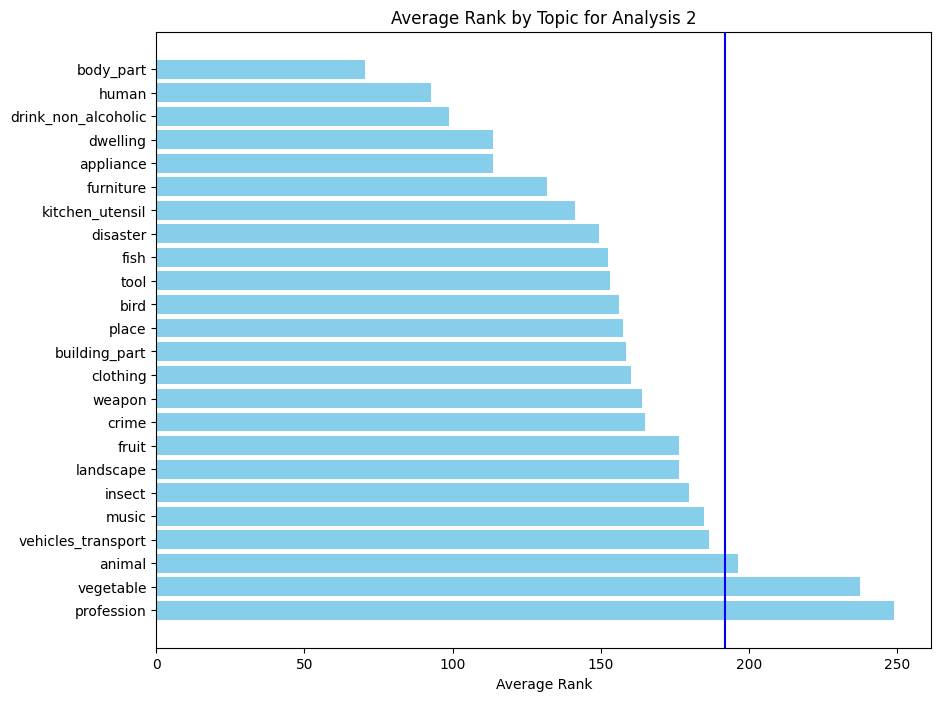

In [ ]:
name_accuracy_384=[]
for id, acc in sorted_topics_384:
  name_accuracy_384.append((topic_names_384[id-1], acc))
name_accuracy_384

topics, avg_ranks = zip(*name_accuracy_384)

# Plotting the topics
plt.figure(figsize=(10, 8))
plt.barh(topics, avg_ranks, color='skyblue')
plt.axvline(x = 384/2, color = 'b', label = 'axvline - full height')
plt.xlabel('Average Rank')
plt.title('Average Rank by Topic for Analysis 2')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
passages_243 = exp3_data['labelsPassageForEachSentence']
topics_243 = exp3_data['labelsPassageCategory']
passage_ids_243 = exp3_data['labelsSentences']
topic_names_243 = exp3_data['keyPassageCategory'][0]
sorted_topics_243 = analyze_accuracy_by_topic(concept_rank_243, topics_243, passages_243)
print("Sorted Topics for Analysis 3 by Average Rank Accuracy:", sorted_topics_243)

Sorted Topics for Analysis 3 by Average Rank Accuracy: [(7, 52.8), (22, 58.2), (5, 59.1), (14, 63.63636363636363), (4, 68.0909090909091), (12, 68.2), (8, 71.6), (23, 78.66666666666667), (16, 80.9), (18, 81.7), (6, 89.5), (9, 99.8), (24, 101.4), (3, 104.9), (20, 108.18181818181819), (1, 110.7), (11, 118.2), (10, 119.6), (21, 129.5), (17, 136.6), (19, 147.2), (13, 148.1), (15, 148.6), (2, 169.8181818181818)]


<ipython-input-26-b50238ccd124>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  passage_id = int(passages[i])  # Convert passage_id to integer
<ipython-input-26-b50238ccd124>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  topic_id = int(topics[passage_id-1])  # Convert topic_id to integer


In [ ]:
topic_names_243=[name[0] for name in topic_names_243]
print(topic_names_243)
print(sorted_topics_243)

['astronaut', 'beekeeping', 'blindness', 'bone_fracture', 'castle', 'computer_graphics', 'dreams', 'gambling', 'hurricane', 'ice_cream', 'infection', 'law_school', 'lawn_mower', 'opera', 'owl', 'painter', 'pharmacist', 'polar_bear', 'pyramid', 'rock_climbing', 'skiing', 'stress', 'taste', 'tuxedo']
[(7, 52.8), (22, 58.2), (5, 59.1), (14, 63.63636363636363), (4, 68.0909090909091), (12, 68.2), (8, 71.6), (23, 78.66666666666667), (16, 80.9), (18, 81.7), (6, 89.5), (9, 99.8), (24, 101.4), (3, 104.9), (20, 108.18181818181819), (1, 110.7), (11, 118.2), (10, 119.6), (21, 129.5), (17, 136.6), (19, 147.2), (13, 148.1), (15, 148.6), (2, 169.8181818181818)]


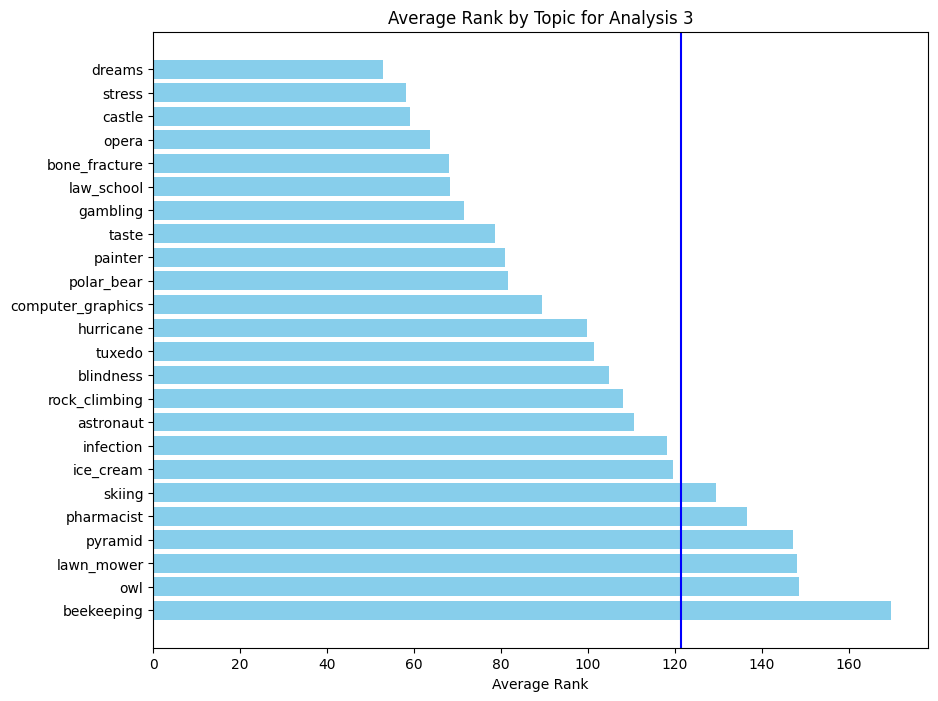

In [ ]:
name_accuracy_243=[]
for id, acc in sorted_topics_243:
  name_accuracy_243.append((topic_names_243[id-1], acc))
name_accuracy_243

topics, avg_ranks = zip(*name_accuracy_243)

# Plotting the topics
plt.figure(figsize=(10, 8))
plt.barh(topics, avg_ranks, color='skyblue')
plt.axvline(x = 243/2, color = 'b', label = 'axvline - full height')
plt.xlabel('Average Rank')
plt.title('Average Rank by Topic for Analysis 3')
plt.gca().invert_yaxis()
plt.show()

#Semi-Structured Task

In [11]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/project_lcc')
os.listdir('.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['glove.42B.300d.txt',
 'vectors_384sentences.GV42B300.average.txt',
 'vectors_243sentences.GV42B300.average.txt',
 'stimuli_384sentences.txt',
 'stimuli_243sentences.txt',
 'EXP3.pkl',
 'neuralData_for_EXP1.csv',
 'EXP2.pkl',
 'stimuli_180concepts.txt',
 'learn_decoder.py',
 'vectors_180concepts.GV42B300.txt',
 'imaging_data.csv',
 '__pycache__',
 'colab_pdf.py']

In [12]:
import numpy as np
import pandas as pd
from transformers import BertModel, BertTokenizer

# Load and prepare data from Experiment 2 and 3
import pickle

with open('EXP2.pkl', 'rb') as f:
    exp2_data = pickle.load(f)
    print(exp2_data.keys())

FMRI_EXP2 = exp2_data["Fmridata"]
concept_keys_EXP2 = list(map(lambda x: int(exp2_data['labelsPassageCategory'][int(x)-1]), exp2_data["labelsPassageForEachSentence"]))
concepts_EXP2 = list(map(lambda x: str(exp2_data['keyPassageCategory'][0][x-1][0]), concept_keys_EXP2))


with open('EXP3.pkl', 'rb') as f:
    exp3_data = pickle.load(f)
    print(exp3_data.keys())

FMRI_EXP3 = exp3_data["Fmridata"]
concept_keys_EXP3 = list(map(lambda x: int(exp3_data['labelsPassageCategory'][int(x)-1]), list(exp3_data["labelsPassageForEachSentence"])))
concepts_EXP3 = list(map(lambda x: str(exp3_data['keyPassageCategory'][0][x-1][0]), concept_keys_EXP3))

# Combine FMRI data and concepts
FMRI_combined = np.vstack((FMRI_EXP2, FMRI_EXP3))
concepts_combined = concepts_EXP2 + concepts_EXP3

print(len(FMRI_combined))
print(FMRI_combined.shape)
print(len(concepts_combined))
print(len(concepts_combined[626]))
print(concepts_combined[626])

dict_keys(['__header__', '__version__', '__globals__', 'keyPassageCategory', 'keyPassages', 'keySentences', 'labelsPassageCategory', 'labelsPassageForEachSentence', 'labelsSentences', 'meta', 'Fmridata'])


<ipython-input-12-d9a498c8bd63>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  concept_keys_EXP2 = list(map(lambda x: int(exp2_data['labelsPassageCategory'][int(x)-1]), exp2_data["labelsPassageForEachSentence"]))


dict_keys(['__header__', '__version__', '__globals__', 'keyPassageCategory', 'keyPassages', 'keySentences', 'labelsPassageCategory', 'labelsPassageForEachSentence', 'labelsSentences', 'meta', 'Fmridata'])


<ipython-input-12-d9a498c8bd63>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  concept_keys_EXP3 = list(map(lambda x: int(exp3_data['labelsPassageCategory'][int(x)-1]), list(exp3_data["labelsPassageForEachSentence"])))


627
(627, 185866)
627
6
skiing


In [58]:


# Load and process stimuli sentences for Experiment 2
sentences_file_path = 'stimuli_384sentences.txt'
with open(sentences_file_path, "r") as f:
    sentences = f.readlines()

# Initialize BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Embed the raw text sentences using BERT
def get_bert_embeddings(sentences, model, tokenizer):
    embeddings = []
    for sentence in sentences:
        inputs = tokenizer(sentence, return_tensors='pt')
        outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state.mean(dim=1).detach().numpy())
    return np.array(embeddings)

# Get embeddings for the sentences
sentences_vectors_BERT = get_bert_embeddings(sentences, bert_model, tokenizer)

# Load p-values for significant voxels
# df = pd.read_csv("regressed_BERT.csv")
# pvals_BERT = df['p_value']

# def extract_sig_voxel_inds(Pval_list, sig_threshold=0.05):
#     sig_voxels = set()
#     for voxel in range(len(Pval_list)):
#         if Pval_list[voxel] < sig_threshold:
#             sig_voxels.add(voxel)
#     return sig_voxels

# BERT_sig_voxels = extract_sig_voxel_inds(pvals_BERT)

# os.chdir('/content')
# # Confirm the change
# print("Returned to the default working directory:", os.getcwd())
from learn_decoder import *


# Decoding and evaluation
def cosine_similarity(x, y):
    dot_prod = np.dot(x, y)
    norm_prod = np.linalg.norm(x) * np.linalg.norm(y)
    return dot_prod / norm_prod

def create_average_rank(data, vectors, k_folds, num_concepts, concepts_list_ordinal):
    folds_avg_ranks = []
    concept_rank = []
    indices = list(range(num_concepts))
    size_of_fold = num_concepts // k_folds
    print(size_of_fold, num_concepts)

    for fold_i in range(k_folds):
        print('Calculating fold ' + str(fold_i + 1))
        test_inds = indices[fold_i * size_of_fold:(fold_i + 1) * size_of_fold]
        train_inds = indices[0:fold_i * size_of_fold] + indices[(fold_i + 1) * size_of_fold:]

        data_test_vectors = np.take(data, test_inds, 0)
        data_train_vectors = np.take(data, train_inds, 0)

        semantic_test_vectors = np.take(vectors, test_inds, 0)
        semantic_train_vectors = np.take(vectors, train_inds, 0)

        model = learn_decoder(data_train_vectors, semantic_train_vectors)

        sum_ranks = 0
        for i in range(len(test_inds)):
            our_pred = np.dot(data_test_vectors[i], model)
            true_concept = semantic_test_vectors[i]

            ranked = sorted(vectors, key=lambda sem_vec: cosine_similarity(sem_vec, our_pred), reverse=True)
            sum_ranks += np.argwhere(ranked == true_concept)[0][0] + 1
            concept_rank.append(np.argwhere(ranked == true_concept)[0][0] + 1)
        folds_avg_ranks.append(sum_ranks / size_of_fold)

    print(concept_rank)
    print(len(concept_rank))
    return folds_avg_ranks, concept_rank

# Run decoding analysis
# # Example assuming FMRI_EXP2 is the 3D array with shape (samples, time_steps, features)
FMRI_EXP2_reshaped = FMRI_EXP2.reshape(FMRI_EXP2.shape[0], -1)

# Similarly reshape the BERT embeddings if they are 3D
sentences_vectors_BERT_reshaped = sentences_vectors_BERT.reshape(sentences_vectors_BERT.shape[0], -1)

# Run decoding analysis with reshaped data
average_ranks, concept_ranks = create_average_rank(FMRI_EXP2_reshaped, sentences_vectors_BERT_reshaped, 16, len(FMRI_EXP2_reshaped), concepts_EXP2)

24 384
Calculating fold 1
Calculating fold 2
Calculating fold 3
Calculating fold 4
Calculating fold 5
Calculating fold 6
Calculating fold 7
Calculating fold 8
Calculating fold 9
Calculating fold 10
Calculating fold 11
Calculating fold 12
Calculating fold 13
Calculating fold 14
Calculating fold 15
Calculating fold 16
[44, 186, 52, 329, 21, 44, 290, 199, 1, 11, 17, 11, 169, 153, 79, 90, 54, 127, 203, 125, 11, 55, 256, 19, 98, 68, 4, 1, 7, 32, 54, 63, 80, 114, 235, 19, 26, 44, 298, 319, 15, 24, 180, 16, 14, 23, 27, 67, 6, 51, 309, 25, 372, 371, 49, 76, 83, 59, 119, 16, 20, 52, 37, 21, 68, 212, 44, 9, 15, 105, 110, 119, 141, 227, 379, 206, 189, 131, 66, 93, 96, 41, 283, 343, 48, 25, 64, 200, 24, 1, 47, 73, 55, 274, 16, 145, 16, 81, 5, 79, 332, 5, 66, 186, 260, 22, 28, 249, 246, 133, 240, 333, 9, 306, 248, 59, 26, 40, 26, 45, 343, 81, 371, 135, 3, 89, 99, 19, 194, 38, 207, 21, 62, 2, 58, 19, 173, 144, 11, 4, 66, 35, 67, 209, 34, 226, 154, 324, 2, 33, 2, 148, 28, 130, 174, 210, 26, 9, 162, 2

the average success, meaning the average rank of the true concept is:  112.60677083333333


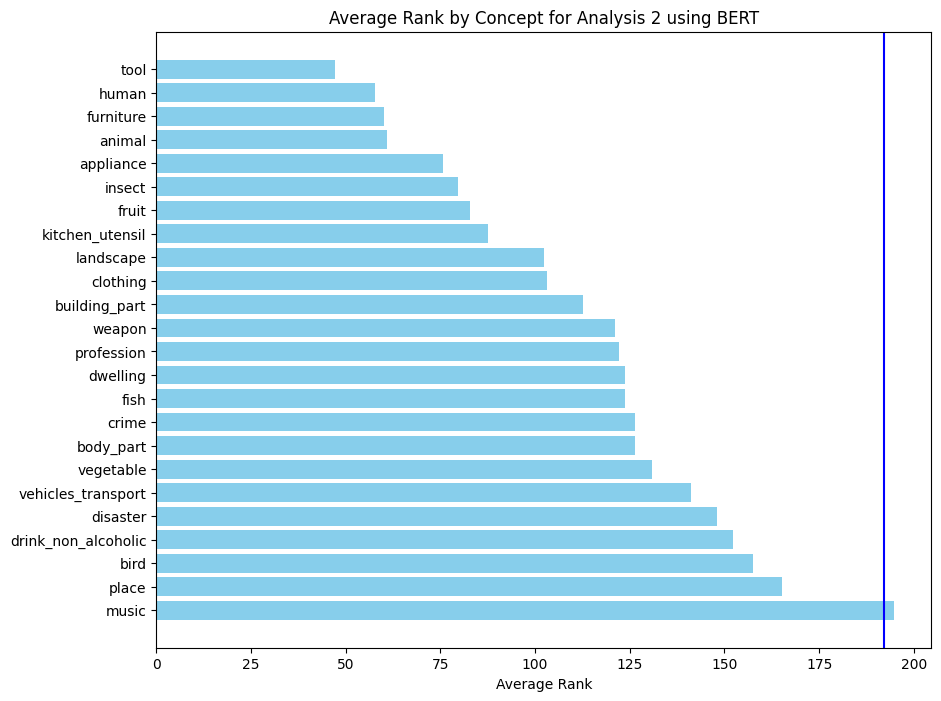

In [ ]:
print("the average success, meaning the average rank of the true concept is: ", np.mean(average_ranks))
from collections import defaultdict

concept_rank_dict = defaultdict(list)

for concept, rank in zip(concepts_EXP2, concept_ranks):
    concept_rank_dict[concept].append(rank)

# Calculate the average rank for each concept
concept_avg_ranks = {concept: sum(ranks) / len(ranks) for concept, ranks in concept_rank_dict.items()}

sorted_concept_avg_ranks = dict(sorted(concept_avg_ranks.items(), key=lambda item: item[1]))

# Extract concepts and average ranks for plotting
concepts = list(sorted_concept_avg_ranks.keys())
avg_ranks = list(sorted_concept_avg_ranks.values())

import matplotlib.pyplot as plt
# Plotting the concepts with their average ranks
plt.figure(figsize=(10, 8))
plt.barh(concepts, avg_ranks, color='skyblue')
plt.axvline(x=384/2, color='b', label='Average Rank = 192')
plt.xlabel('Average Rank')
plt.title('Average Rank by Concept for Analysis 2 using BERT')
plt.gca().invert_yaxis()
plt.show()

In [6]:
os.chdir('/content')


In [ ]:
from statsmodels.regression.linear_model import OLS
import pandas as pd
import numpy as np

# Load fMRI data and sentence vectors
amount_voxels = FMRI_EXP2.shape[1]

# Initialize arrays to store R-squared values and p-values
R2_article = np.zeros(amount_voxels)
Pvals_article = np.zeros(amount_voxels)

# Perform OLS regression for each voxel using GloVe vectors
for voxel_num in range(amount_voxels):
    result_lin_model_voxel = OLS(FMRI_EXP2[:, voxel_num], vectors_384).fit()
    R2_article[voxel_num] = result_lin_model_voxel.rsquared
    Pvals_article[voxel_num] = result_lin_model_voxel.f_pvalue
    if voxel_num % 1000 == 0:
        print(f"{voxel_num} out of {amount_voxels}")

# Save the results to text files
with open('Pvals_article.txt', 'w') as f:
    for item in Pvals_article:
        f.write("%s," % item)

with open('R2_article.txt', 'w') as f:
    for item in R2_article:
        f.write("%s," % item)

# Apply PCA to reduce dimensionality of BERT sentence embeddings
from sklearn.decomposition import PCA
PCA_model = PCA(n_components=300)
BERT_sentence_vecs_reduced = PCA_model.fit_transform(sentences_vectors_BERT)

# Print dimensions to verify
print(len(sentences_vectors_BERT))
print(len(BERT_sentence_vecs_reduced))
print(len(sentences_vectors_BERT[0]))
print(len(BERT_sentence_vecs_reduced[0]))
print('------------')
print(len(FMRI_EXP2))
print(len(FMRI_EXP2[0]))

# Initialize arrays to store R-squared values and p-values for BERT
R2s_BERT = np.zeros(amount_voxels)
Pvals_BERT = np.zeros(amount_voxels)

# Perform OLS regression for each voxel using BERT vectors
for voxel_num in range(amount_voxels):
    result_lin_model_voxel = OLS(FMRI_EXP2[:, voxel_num], BERT_sentence_vecs_reduced).fit()
    Pvals_BERT[voxel_num] = result_lin_model_voxel.f_pvalue
    R2s_BERT[voxel_num] = result_lin_model_voxel.rsquared
    if voxel_num % 1000 == 0:
        print(f"{voxel_num}/{amount_voxels}")

# Save the BERT results to text files
with open('Pvals_BERT.txt', 'w') as f:
    for item in Pvals_BERT:
        f.write("%s," % item)

with open('R2s_BERT.txt', 'w') as f:
    for item in R2s_BERT:
        f.write("%s," % item)

# Function to read p-value files
def read_pval_file(file_name):
    pval_txt_file = open(file_name, "r")
    result = pval_txt_file.read().split(",")
    result.pop()  # Remove last empty element
    result = list(map(float, result))
    pval_txt_file.close()
    return result

# Load the p-values and R2 values from saved text files
Pvals_BERT = read_pval_file('Pvals_BERT.txt')
R2_BERT = read_pval_file('R2s_BERT.txt')
Pvals_article = read_pval_file('Pvals_article.txt')
R2_article = read_pval_file('R2s_article.txt')

# Function to extract significant voxel indices
def extract_sig_voxel_inds(Pval_list, sig_threshold=0.05):
    sig_voxels = set()
    for voxel in range(len(Pval_list)):
        if Pval_list[voxel] < sig_threshold:
            sig_voxels.add(voxel)
    return sig_voxels

# Function to calculate average R2 for significant voxels
def avg_R2(voxel_id_set, R2_list):
    sum_R2 = 0
    for voxel in voxel_id_set:
        sum_R2 += R2_list[voxel]
    return sum_R2 / len(voxel_id_set)

# Print the number of significant voxels and average R2 values
print(f"From BERT there are {len(extract_sig_voxel_inds(Pvals_BERT))} significant voxels")
print(f"From BERT R2 = {round(avg_R2(extract_sig_voxel_inds(Pvals_BERT), R2_BERT), 3)}")
print(f"From article-GloVe there are {len(extract_sig_voxel_inds(Pvals_article))} significant voxels")
print(f"From article R2 = {round(avg_R2(extract_sig_voxel_inds(Pvals_article), R2_article), 3)}")


0 out of 185866
1000 out of 185866
2000 out of 185866
3000 out of 185866
4000 out of 185866
5000 out of 185866
6000 out of 185866
7000 out of 185866
8000 out of 185866
9000 out of 185866
10000 out of 185866
11000 out of 185866
12000 out of 185866
13000 out of 185866
14000 out of 185866
15000 out of 185866
16000 out of 185866
17000 out of 185866
18000 out of 185866
19000 out of 185866
20000 out of 185866
21000 out of 185866
22000 out of 185866
23000 out of 185866
24000 out of 185866
25000 out of 185866
26000 out of 185866
27000 out of 185866
28000 out of 185866
29000 out of 185866
30000 out of 185866
31000 out of 185866
32000 out of 185866
33000 out of 185866
34000 out of 185866


In [59]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming FMRI_EXP2 is the fMRI data (shape: samples x voxels)
# Assuming vectors_384 (GloVe) and sentences_vectors_BERT (BERT) are the embedding vectors (shape: samples x features)

# Function to run the analysis
def run_brain_encoder_analysis(fmri_data, embeddings):
    r2_scores = []

    # Fit a linear regression model for each voxel
    for voxel in range(0,fmri_data.shape[1]):
        print(f'voxel {voxel} of {fmri_data.shape[1]}')
        model = LinearRegression()
        model.fit(embeddings, fmri_data[:, voxel])
        predictions = model.predict(embeddings)
        r2 = r2_score(fmri_data[:, voxel], predictions)
        r2_scores.append(r2)

    r2_scores = np.array(r2_scores)
    return r2_scores

# Run the analysis using GloVe embeddings
r2_scores_glove = run_brain_encoder_analysis(FMRI_EXP2, vectors_384)

# Run the analysis using BERT embeddings
r2_scores_bert = run_brain_encoder_analysis(FMRI_EXP2, sentences_vectors_BERT)

# Determine the number of significant voxels (e.g., R² > 0.1)
significant_voxels_glove = np.sum(r2_scores_glove > 0.1)
significant_voxels_bert = np.sum(r2_scores_bert > 0.1)

# Output the results
print(f'Significant voxels with GloVe embeddings: {significant_voxels_glove}')
print(f'Significant voxels with BERT embeddings: {significant_voxels_bert}')

# You can also compare the distributions of R² scores
import matplotlib.pyplot as plt

plt.hist(r2_scores_glove, bins=50, alpha=0.5, label='GloVe')
plt.hist(r2_scores_bert, bins=50, alpha=0.5, label='BERT')
plt.xlabel('R² Score')
plt.ylabel('Number of Voxels')
plt.legend(loc='upper right')
plt.title('R² Score Distribution for GloVe vs BERT')
plt.show()


voxel 0 of 185866
voxel 1 of 185866
voxel 2 of 185866
voxel 3 of 185866
voxel 4 of 185866
voxel 5 of 185866
voxel 6 of 185866
voxel 7 of 185866
voxel 8 of 185866
voxel 9 of 185866
voxel 10 of 185866
voxel 11 of 185866
voxel 12 of 185866
voxel 13 of 185866
voxel 14 of 185866
voxel 15 of 185866
voxel 16 of 185866
voxel 17 of 185866
voxel 18 of 185866
voxel 19 of 185866
voxel 20 of 185866
voxel 21 of 185866
voxel 22 of 185866
voxel 23 of 185866
voxel 24 of 185866
voxel 25 of 185866
voxel 26 of 185866
voxel 27 of 185866
voxel 28 of 185866
voxel 29 of 185866
voxel 30 of 185866
voxel 31 of 185866
voxel 32 of 185866
voxel 33 of 185866
voxel 34 of 185866
voxel 35 of 185866
voxel 36 of 185866
voxel 37 of 185866
voxel 38 of 185866
voxel 39 of 185866
voxel 40 of 185866
voxel 41 of 185866
voxel 42 of 185866
voxel 43 of 185866
voxel 44 of 185866
voxel 45 of 185866
voxel 46 of 185866
voxel 47 of 185866
voxel 48 of 185866
voxel 49 of 185866
voxel 50 of 185866
voxel 51 of 185866
voxel 52 of 185866
vox

KeyboardInterrupt: 

# Export to PDF

Run the following cell to download the notebook as a nicely formatted pdf file.

In [1]:
# Add to a new cell at the end of the notebook and run the follow code,
# which will save the notebook as pdf in your google drive (allow the permissions) and download it automatically.

!wget -nc https://raw.githubusercontent.com/lacclab/colab-pdf/master/colab_pdf.py

from colab_pdf import colab_pdf

# If you saved the notebook in the default location in your Google Drive,
# and didn't change the name of the file, the code should work as is.
# If not, adapt accordingly.

colab_pdf(file_name='Another copy of Lcc_proj.ipynb', notebookpath="/content/drive/MyDrive/Colab Notebooks/")

--2024-08-26 15:43:45--  https://raw.githubusercontent.com/lacclab/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1911 (1.9K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.87K  --.-KB/s    in 0s      

2024-08-26 15:43:45 (30.2 MB/s) - ‘colab_pdf.py’ saved [1911/1911]

Mounted at /content/drive/


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


Extracting templates from packages: 100%
Running command: jupyter nbconvert --output-dir='/content/drive/MyDrive/' '/content/drive/MyDrive/Colab Notebooks/Another copy of Lcc_proj.ipynb' --to pdf
[NbCon

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'

In [ ]:
list1=[44, 186, 52, 329, 21, 44, 290, 199, 1, 11, 17, 11, 169, 153, 79, 90, 54, 127, 203, 125, 11, 55, 256, 19, 98, 68, 4, 1, 7, 32, 54, 63, 80, 114, 235, 19, 26, 44, 298, 319, 15, 24, 180, 16, 14, 23, 27, 67, 6, 51, 309, 25, 372, 371, 49, 76, 83, 59, 119, 16, 20, 52, 37, 21, 68, 212, 44, 9, 15, 105, 110, 119, 141, 227, 379, 206, 189, 131, 66, 93, 96, 41, 283, 343, 48, 25, 64, 200, 24, 1, 47, 73, 55, 274, 16, 145, 16, 81, 5, 79, 332, 5, 66, 186, 260, 22, 28, 249, 246, 133, 240, 333, 9, 306, 248, 59, 26, 40, 26, 45, 343, 81, 371, 135, 3, 89, 99, 19, 194, 38, 207, 21, 62, 2, 58, 19, 173, 144, 11, 4, 66, 35, 67, 209, 34, 226, 154, 324, 2, 33, 2, 148, 28, 130, 174, 210, 26, 9, 162, 27, 110, 18, 32, 265, 20, 59, 65, 57, 89, 177, 278, 216, 11, 120, 24, 53, 88, 300, 240, 207, 1, 58, 54, 10, 44, 43, 58, 172, 21, 133, 165, 168, 212, 108, 47, 4, 322, 5, 31, 5, 18, 34, 132, 312, 91, 326, 217, 350, 18, 12, 98, 32, 123, 50, 8, 5, 16, 12, 92, 237, 76, 37, 292, 42, 158, 61, 23, 12, 12, 5, 112, 58, 187, 24, 7, 179, 360, 141, 146, 155, 59, 359, 36, 370, 208, 134, 133, 59, 54, 31, 332, 279, 105, 35, 81, 227, 258, 295, 10, 16, 59, 230, 43, 58, 19, 96, 2, 20, 27, 56, 95, 220, 203, 129, 33, 54, 5, 99, 62, 39, 185, 221, 234, 371, 36, 52, 2, 15, 96, 70, 45, 31, 8, 297, 312, 18, 3, 87, 150, 124, 123, 33, 63, 270, 146, 196, 40, 197, 57, 278, 18, 85, 70, 7, 28, 88, 25, 52, 30, 10, 116, 39, 199, 200, 5, 101, 87, 120, 21, 38, 269, 195, 218, 48, 37, 241, 116, 81, 151, 72, 364, 27, 32, 67, 198, 364, 92, 46, 112, 349, 303, 336, 349, 132, 260, 304, 98, 359, 311, 90, 170, 23, 154, 6, 6, 95, 139, 91, 348, 16, 176, 147, 19, 34, 213, 30, 27, 202, 124, 296, 4, 57, 70, 16]
print(len(list1))

384
